In [1]:
import numpy as np
import pandas as pd
import quandl
df = quandl.get('WIKI/GOOGL')
import math
import datetime
from sklearn import preprocessing,cross_validation,svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [3]:
df['High_Close']= (df['Adj. High']-df['Adj. Close'])/df['Adj. Close']*100.0
df['Open_Close']= (df['Adj. Open']-df['Adj. Close'])/df['Adj. Open']*100.0
df=df[['Adj. Close','High_Close','Open_Close','Adj. Volume']]
df.head()

,Adj. Close,High_Close,Open_Close,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,-0.324968,44659000.0
2004-08-20,54.322689,0.710922,-7.227007,22834300.0
2004-08-23,54.869377,3.729433,1.227880,18256100.0
2004-08-24,52.597363,6.417469,5.726357,15247300.0
2004-08-25,53.164113,1.886792,-1.183658,9188600.0


In [4]:
#Shifing label col to tomorrow's close value so  features will be Adj. Close 	High_Close 	Open_Close 	Adj. Volume 
# and label (to be predicted) is tomorrow's Adj. Close value
df['label_tomorrow_Adj. Close']= df['Adj. Close'].shift(-1)
#df.dropna(inplace=True)

df.head()


,Adj. Close,High_Close,Open_Close,Adj. Volume,label_tomorrow_Adj. Close
Date,,,,,
2004-08-19,50.322842,3.712563,-0.324968,44659000.0,54.322689
2004-08-20,54.322689,0.710922,-7.227007,22834300.0,54.869377
2004-08-23,54.869377,3.729433,1.227880,18256100.0,52.597363
2004-08-24,52.597363,6.417469,5.726357,15247300.0,53.164113
2004-08-25,53.164113,1.886792,-1.183658,9188600.0,54.122070


In [5]:
# Other variables are features to classifier 
x= np.array(df.drop(['label_tomorrow_Adj. Close'],1))
#x is set of features
#selecting all elements except last
x=x[:-1]
# y / Tomorrow's Ajd. Close value is label to classifier
#selecting all elements except last
y = np.array(df['label_tomorrow_Adj. Close'])
y=y[:-1]

#Scaling data to same scale
#x= preprocessing.scale(x)
    

In [6]:
#Spliting data into test train set
x_train,x_test,y_train,y_test=cross_validation.train_test_split(x,y,test_size=0.5)
#Linear Regression Classifier
clf = LinearRegression(n_jobs=-1)
#Support vector regression classifier
#clf =svm.SVR()
#training classifier on train data
clf.fit(x_train,y_train)
#testing model/classifier on test data
accuracy = clf.score(x_test,y_test)
print(accuracy)

0.998964997957


In [7]:
last_day=df.iloc[-1:,:4]
forecast_set= clf.predict(last_day)
print(forecast_set)

[ 836.80301204]


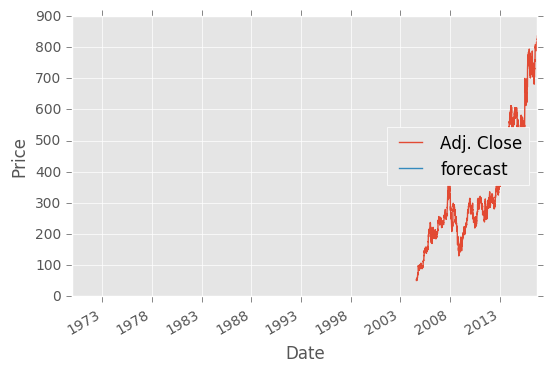

In [36]:
df['forecast']= np.nan
last_date=df.iloc[-1].name
last_day=last_date.second
one_day=86400
next_day=one_day+last_day
for i in forecast_set:
    next_date= datetime.datetime.fromtimestamp(next_day)
    next_day=next_day+one_day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj. Close'].plot()
df['forecast'].plot()
plt.legend(loc=7)
plt.xlabel('Date')
plt.ylabel('Price')
#plt.axis([2003,2016,0,1000])
plt.show()

In [ ]:
datetime